In [1]:
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

In [120]:
direc = 'C:/Users/svo/Documents/FourinarowData/Data/peak/'

In [144]:
filenames = [f for f in os.listdir(direc + 'raw/') if f.endswith('.csv')]
filenames = sorted(filenames,key=lambda f : f.casefold().replace('100.csv','99.csv'))

In [147]:
if not os.path.exists(direc + 'splits/'):
    os.mkdir(direc + 'splits/')
for i,f in enumerate(filenames):
    df = pd.read_csv(direc + 'raw/' + f,header=None,delim_whitespace=True,names=['bp','wp','color','move','rt','participant_id'])
    df.insert(loc=5,column='group',value=(5*(np.random.permutation(len(df))/len(df))).astype(int)+1)
    if not os.path.exists(direc + 'splits/' + str(i+1)):
        os.mkdir(direc + 'splits/' + str(i+1))
    with open(direc + 'splits/' + str(i+1) + '/data.csv','w') as f:
        f.write(df.to_csv(None, index = False, header=False,sep='\t',line_terminator ='\n')[:-1])
    for g in range(1,6):
        with open(direc + 'splits/' + str(i+1) + '/' + str(g) + '.csv','w') as f:
            f.write(df[df['group']==g].to_csv(None, index = False, header=False,sep='\t',line_terminator ='\n')[:-1])

In [60]:
def display_board(bp,wp,move,color):
    fig = plt.figure()
    ax = fig.add_subplot(111,aspect='equal')
    rec = patches.Rectangle((-0.5,-0.5),9,4,color="gray",fill=True,zorder=1)
    ax.add_patch(rec)
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    for i in range(36):
        if(bp[i]=='1'):
            circ = patches.Circle((i%9,3-i//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if(wp[i]=='1'):
            circ = patches.Circle((i%9,3-i//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
    circ = patches.Circle((move%9,3-move//9),0.33,color=color,fill=False)
    circ = ax.add_patch(circ)
    ax.axis('off')
    plt.show()

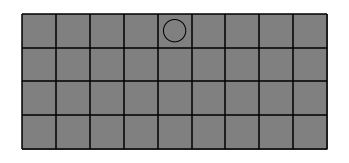

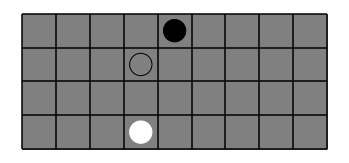

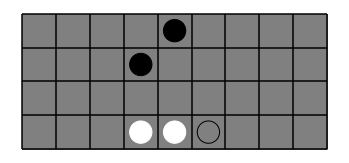

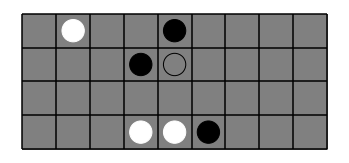

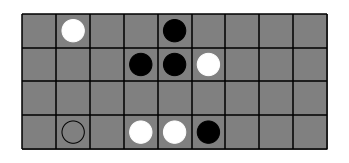

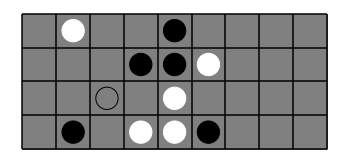

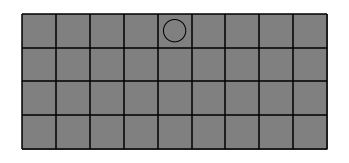

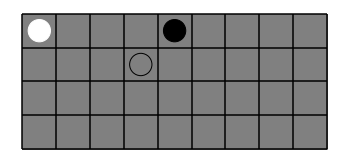

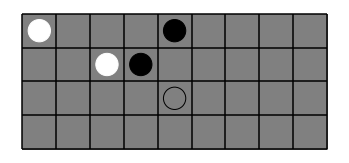

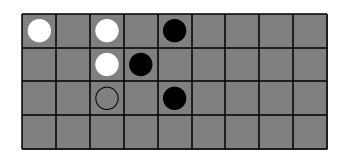

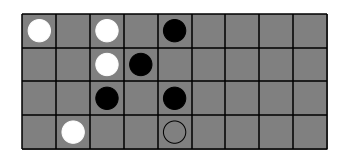

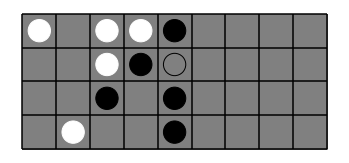

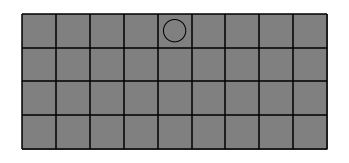

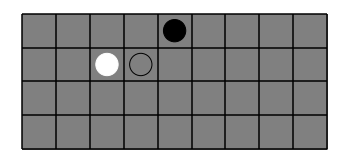

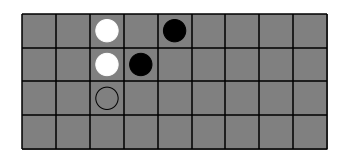

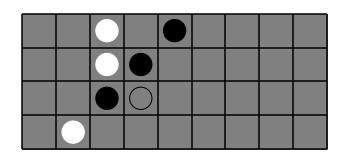

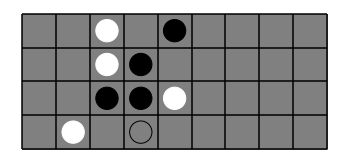

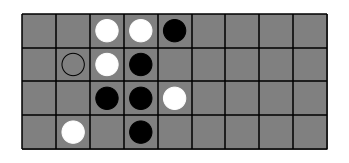

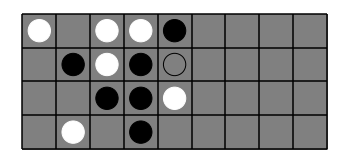

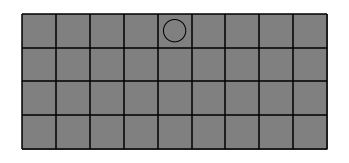

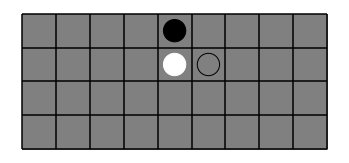

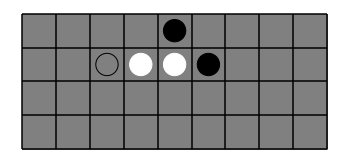

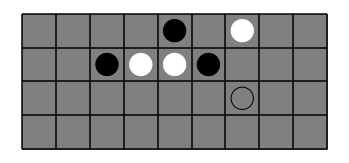

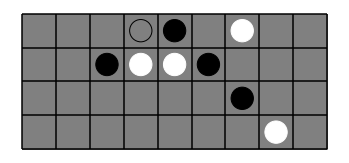

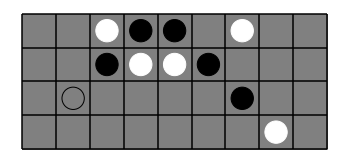

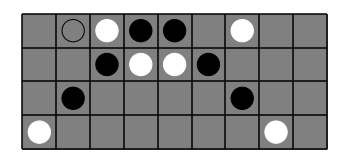

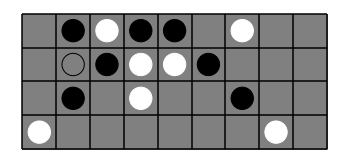

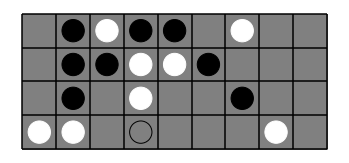

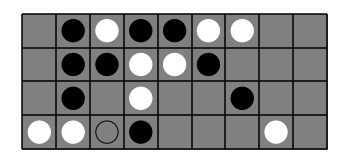

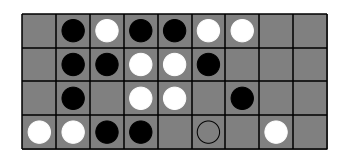

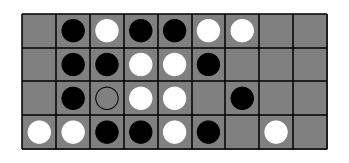

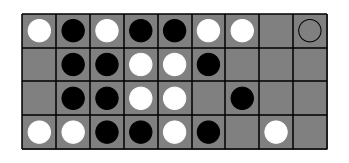

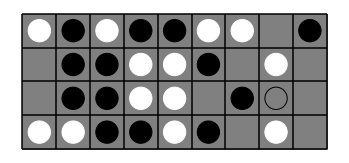

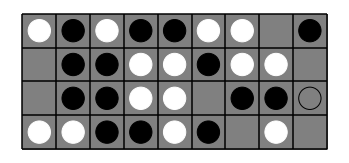

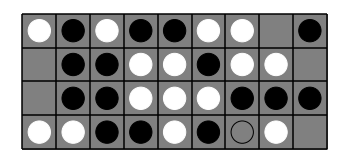

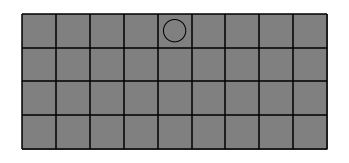

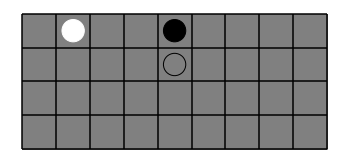

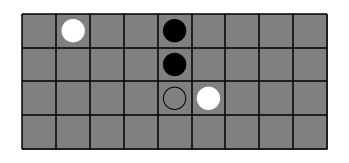

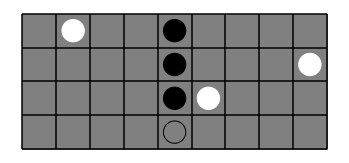

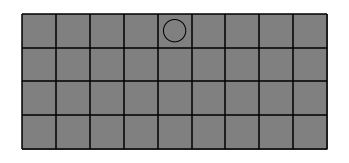

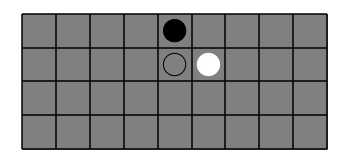

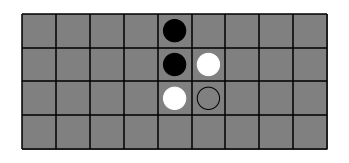

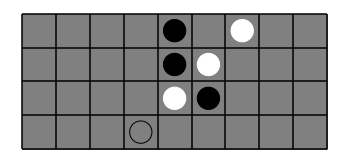

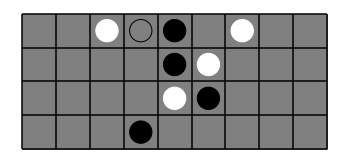

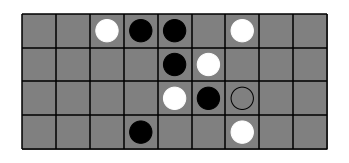

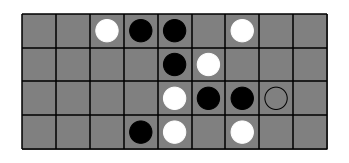

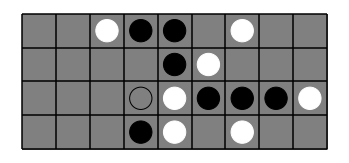

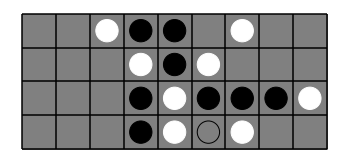

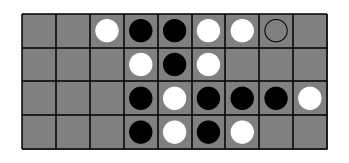

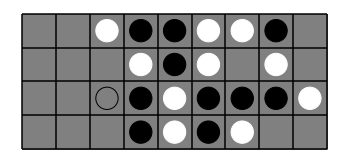

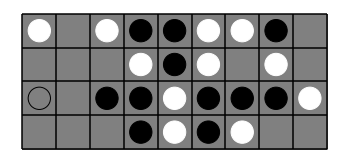

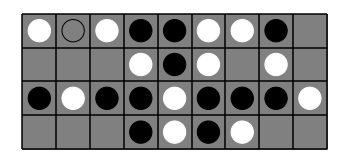

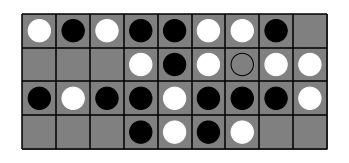

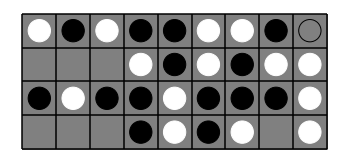

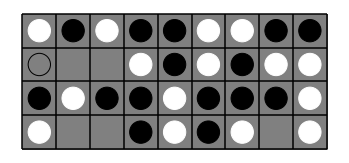

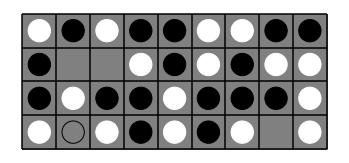

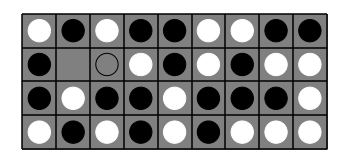

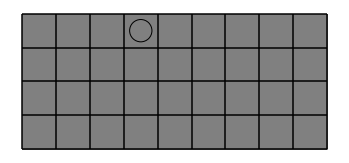

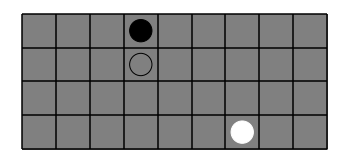

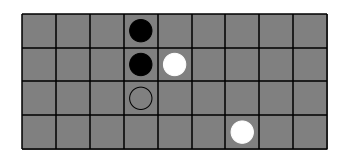

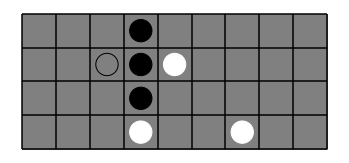

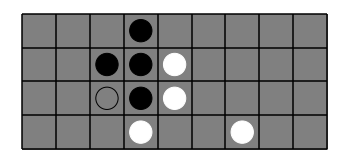

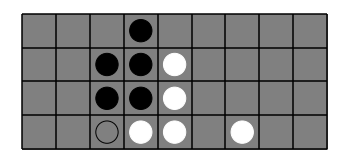

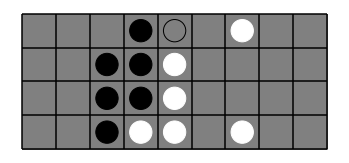

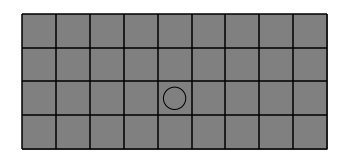

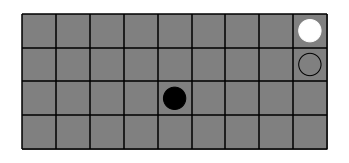

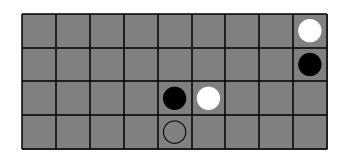

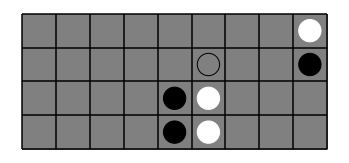

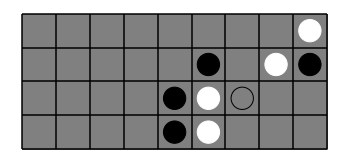

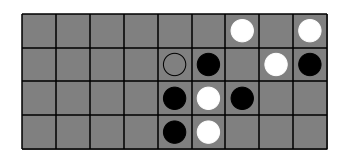

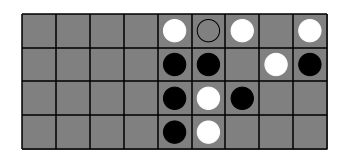

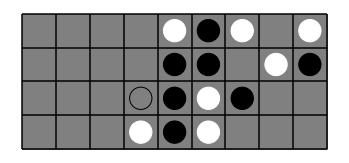

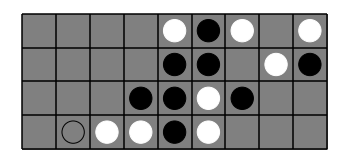

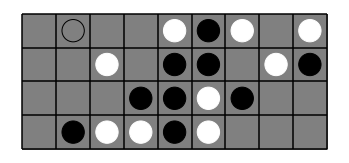

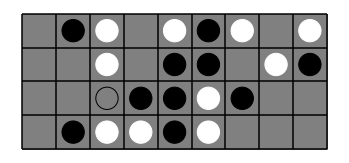

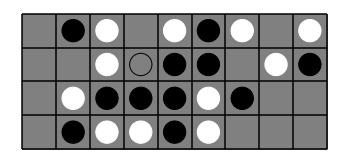

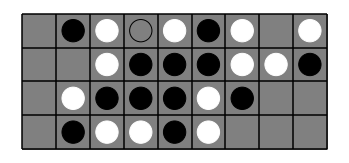

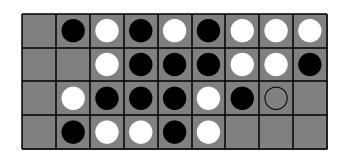

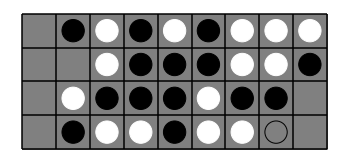

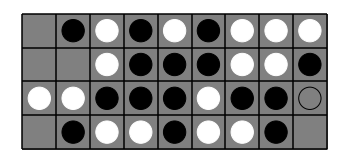

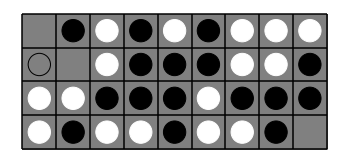

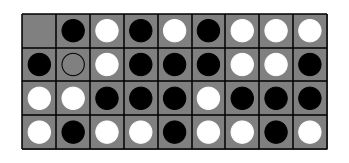

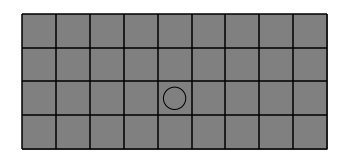

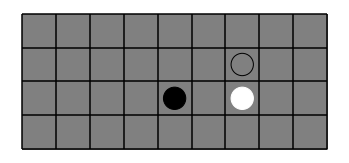

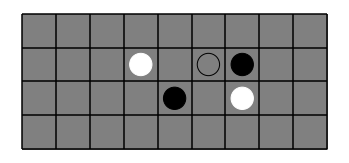

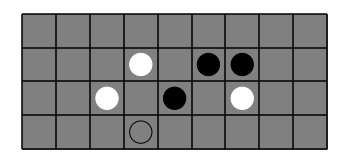

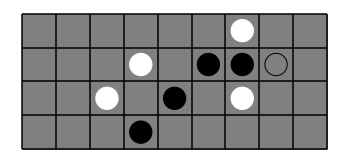

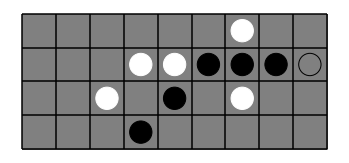

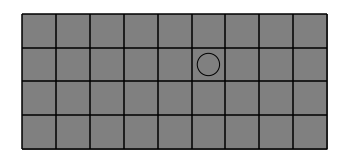

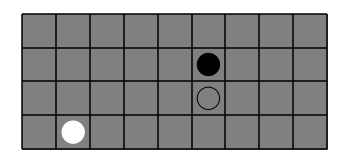

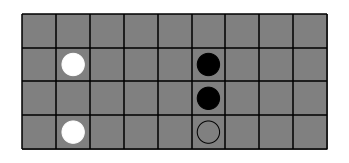

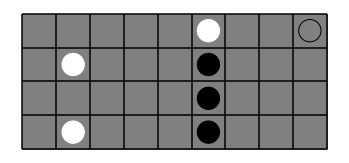

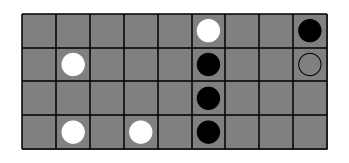

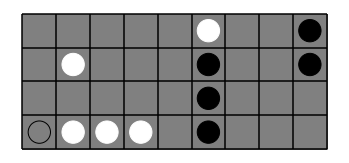

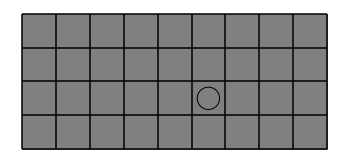

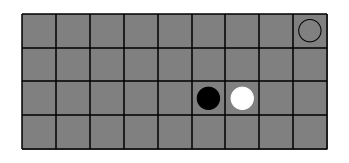

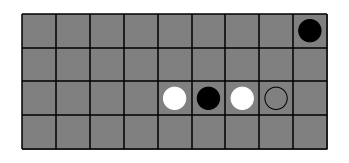

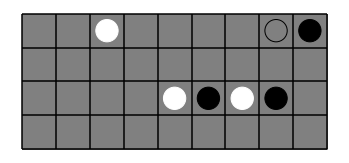

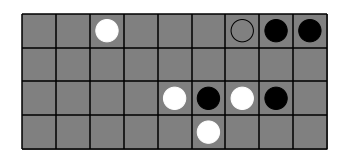

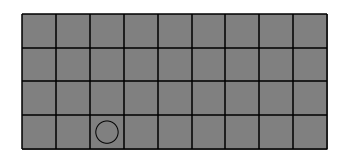

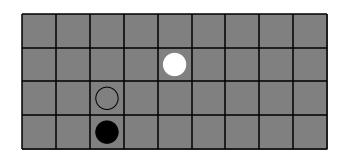

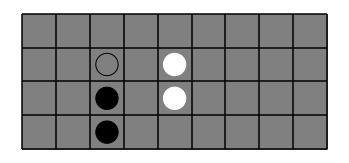

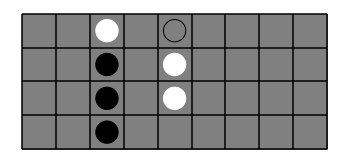

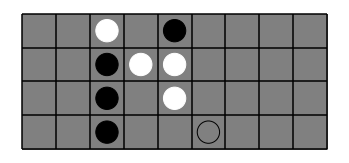

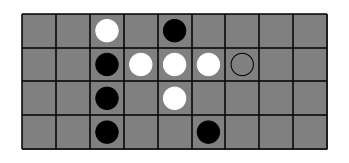

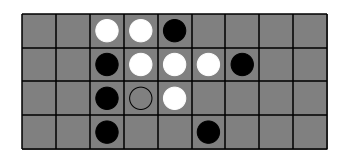

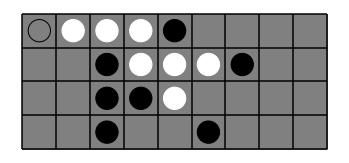

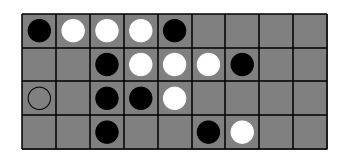

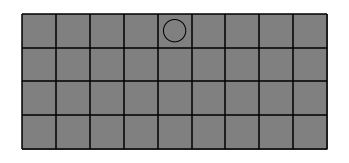

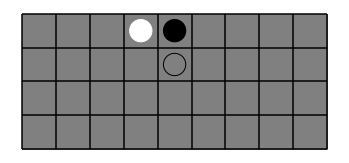

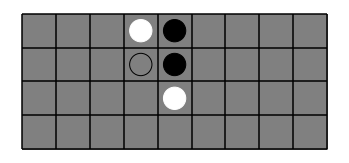

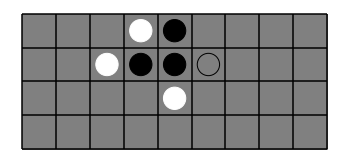

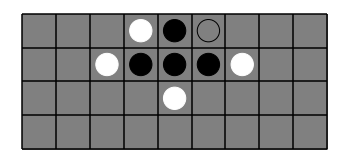

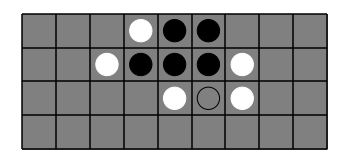

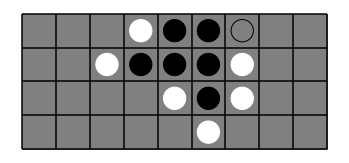

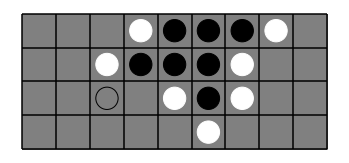

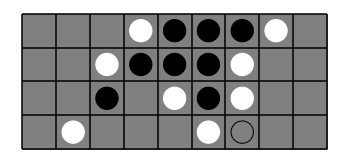

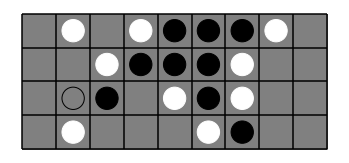

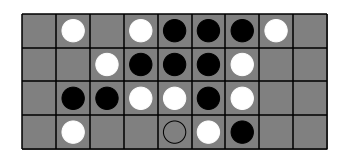

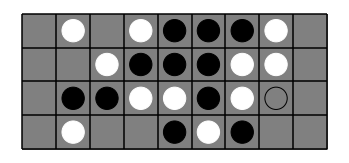

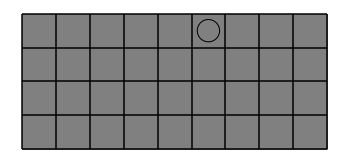

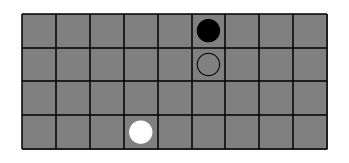

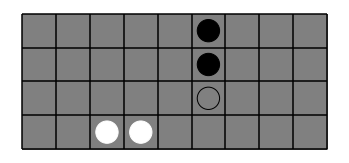

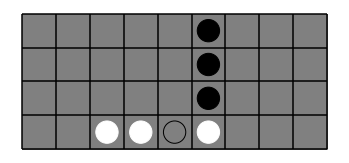

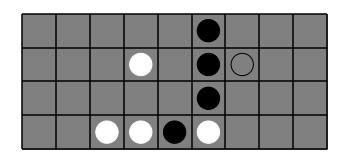

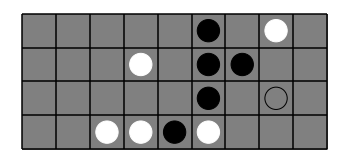

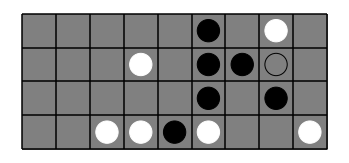

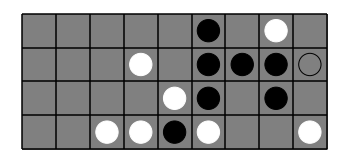

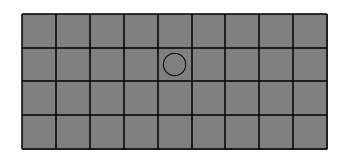

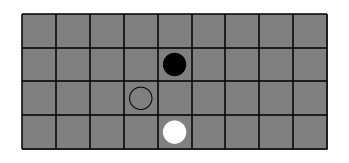

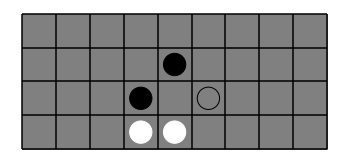

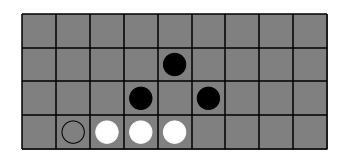

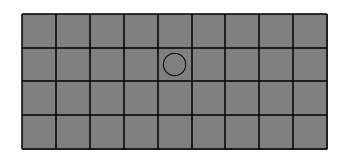

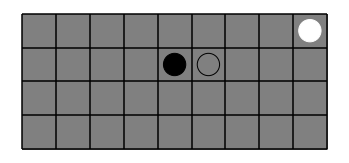

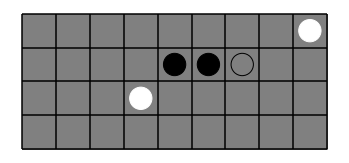

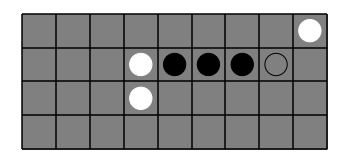

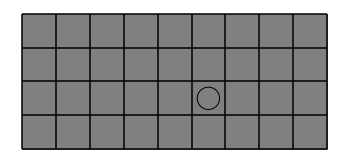

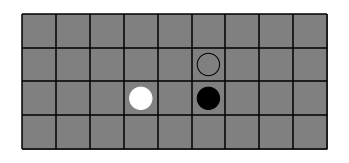

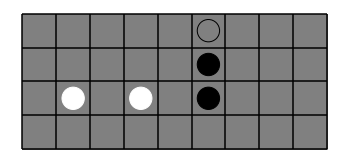

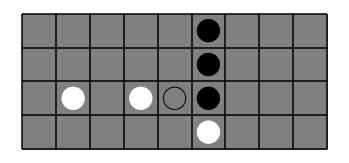

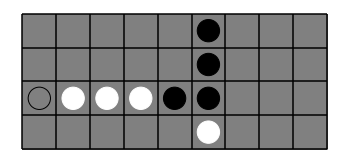

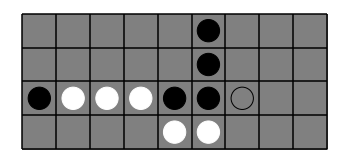

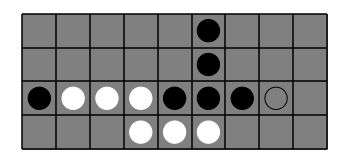

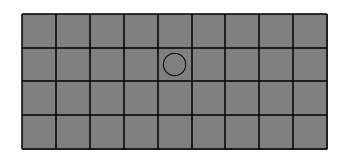

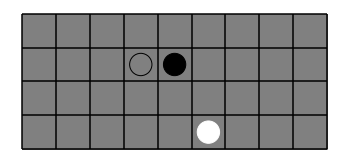

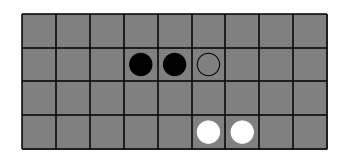

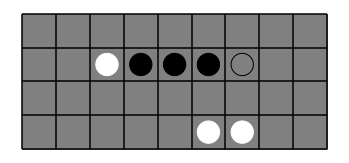

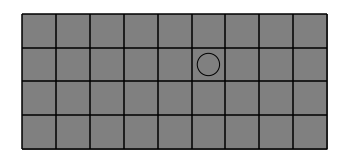

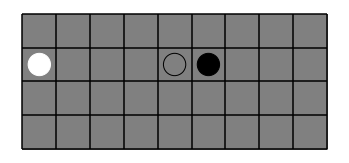

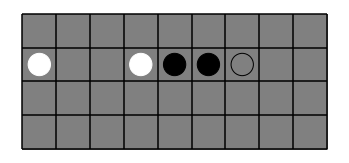

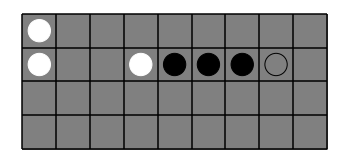

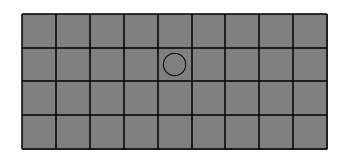

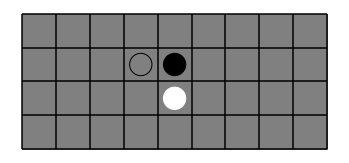

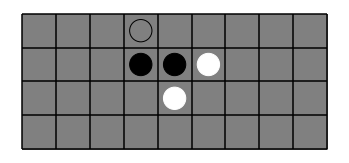

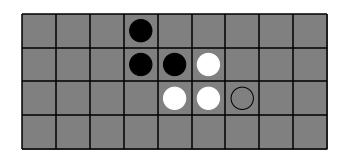

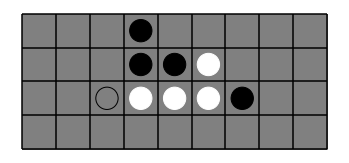

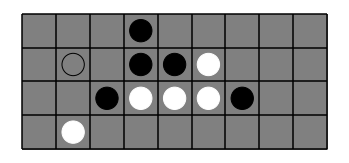

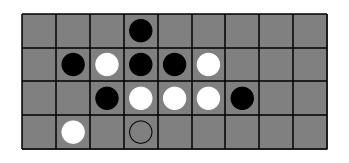

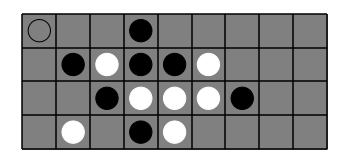

In [87]:
df = pd.read_csv(direc + 'raw/' + filenames[0],header=None,delim_whitespace=True,names=['bp','wp','color','move','rt','participant_id'])
for _,row in df.iterrows():
    display_board(decode_board(row['bp']),decode_board(row['wp']),decode_move(row['move']),row['color'].lower())

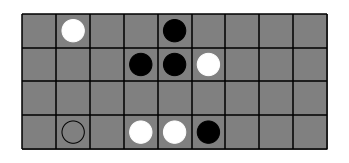

In [99]:
for _,row in list(df.iterrows())[4:5]:
    display_board(decode_board(row['bp']),decode_board(row['wp']),decode_move(row['move']),row['color'].lower())

In [82]:
def decode_board(x):
    return "{0:036b}".format(x)

def decode_move(x):
    return 36-x.bit_length()

In [111]:
print('bp = np.array([',','.join(decode_board(df['bp'][4])),'])')
print('wp = np.array([',','.join(decode_board(df['wp'][4])),'])')


bp = np.array([ 0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0 ])
wp = np.array([ 0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0 ])


In [108]:
decode_move(8)

32

In [110]:
decode_board(15)

'000000000000000000000000000000001111'

In [86]:
decode_move(1)

35